# Chapter 3.2: Analytical Projections for World Population

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

In [1]:
import sys
sys.path.append('..\\..\\ModSimPy_Directory')
from ModSimPy_Functions.modsim import *

import pandas as pd

## Historical World Population

The Wikipedia page about world population growth includes estimates for world population from 12,000 years ago to the present (see <https://en.wikipedia.org/wiki/World_population_estimates.html>).

The following cells download an archived version of this page and read the data into a Pandas `DataFrame`.

In [2]:
filename = '../Images_and_Data/Data/World_population_estimates.html'
tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Some of the values are null because not all researchers provide estimates for the same dates.

Again, we'll replace the long column names with more convenient abbreviations.

In [3]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [4]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

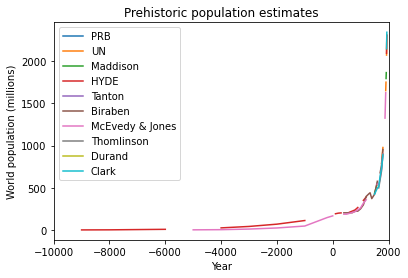

In [7]:
table1.plot(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates');

We can use `xlim`, which provides limiting values for the x-axis, to zoom in on everything after Year 0.

The following figure shows the estimates of several research groups from 1 CE to the near present.

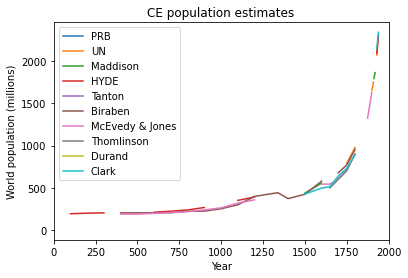

In [8]:
table1.plot(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates');

### Exercise 1

See if you can find a model that fits these estimates from 100 to 2000.  Check the 3 models that we explored in the previous chapters (linear, proporational, and quadratic).

Notice that we don't need create a `change_func` to do this--that is, we don't have to create our plots using a loop and a `results[i+1] = results[i] + net_growth`.  We now have some particular solutions to our 3 models (from chapter 9), and we can plot by simply defining the population
at each time step with the solution equations.

In [9]:
tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

un = table2.un / 1e9
census = table2.census / 1e9

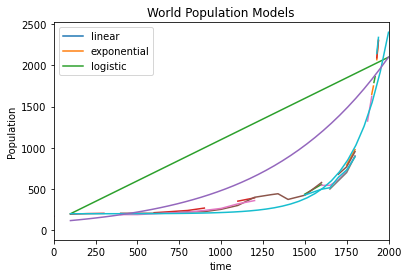

In [35]:
# Find a function that comes closest to matching the data from 100-2000.  
# Plot all three if you'd like. Put your results in Series()

from numpy import exp

# Create a time array of times to evaluate the functions
t_array = linspace(100, 2000, 40)

# Linear model of form f(t) = Ct + x_0
x_0 = 100
C = 1.0
lin_array = C*t_array + x_0
linear = pd.Series(data=lin_array,index=t_array)
    
# Exponential Growth model of form f(t) = C1 exp(alpha*t)+ C2
# Notice I added a C2 shift value to get near the starting point at t = 100
C1 = 0.1
C2 = 200
alpha = 0.005
prop_array = C2 + C1 * exp(alpha * t_array)
prop = pd.Series(data=prop_array,index=t_array)
    
# Quadratic growth model of the logistic form
K = 14000 # Carrying capacity
r = 0.0016
p_0 = 100 
quad_array = K*p_0*exp(r*t_array)/(K + p_0*exp(r*t_array) - p_0)
    
# Plot your function next to the world population data
table1.plot(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates',legend=False)

linear.plot(label='linear',color='C22',ylabel='Population',xlabel='time',
         title='World Population Models',xlim=[0,2000],legend=True)
prop.plot(label='exponential',color='C29',legend=True)
quad.plot(label='logistic',color='C24',legend=True);

# Clearly the exponential model works best over the past two millenia.